In [ ]:
# 최고 정확도를 0으로 설정
# 손실 함수를 메트릭으로 사용하는 경우 최고의 손실을 무한대로 정의할 수 있음
best_acc = 0
best_parameters = {'a':0, 'b':0, 'c':0}

# 가상의 모델을 만들어 조합을 찾는 방법 보기
for a in range(1,11):
    for b in range(1,11):
        for c in range(1, 11):
            # 모델을 현재의 변수로 초기화 한다.
            model = Model(a, b, c)
            # 모델을 학습한다.
            model.fit(training_data)
            # 예측 생성
            preds = model.predict(validation_data)
            # 정확도 계산
            accuracy = metrics.accuracy_score(targets, preds)
        # 현재 정확도가 최고 정확도보다 높은 경우
        # 현재 변수를 저장한다.
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_parameters["a"] = a
            best_parameters["b"] = b
            best_parameters["c"] = c

## [격자 검색]

In [3]:
# 격자 검색
import numpy as np
import pandas as pd
from sklearn import ensemble
from sklearn import metrics
from sklearn import model_selection
if __name__ == "__main__":
    
    # 학습 데이터를 불러온다.
    df = pd.read_csv("mobile_train.csv")
    
    # price_range 를 제외한 모든 열을 피쳐로 사용한다.
    # 이 데이터에는 id 열이 없다.
    X = df.drop("price_range", axis=1).values
    
    # 타겟 변수를 추출한다.
    y = df.price_range.values
    
    # 모델을 정의한다.
    # 랜덤포레스트를 n_jobs=-1 로 초기화한다.
    # n_jobs=-1 => 사용가능한 모든 CPU 코어를 사용한다.
    classifier = ensemble.RandomForestClassifier(n_jobs=-1)
    
    # 변수의 격자를 정의한다.
    # 이는 사전 혹은 사전의 목록으로 정의할 수 있다.
    param_grid = {
    "n_estimators": [100, 200, 250, 300, 400, 500],
    "max_depth": [1, 2, 5, 7, 11, 15],
    "criterion": ["gini", "entropy"]
}

    # 격자 검색을 초기화한다.
    # estimator 는 앞서 초기화한 모델이다.
    # param_grid 는 변수의 격자이다.
    # 정확도를 메트릭으로 사용한다. 원하는 메트릭을 정의할 수 있다.
    # 높은 값의 verbose 일수록 보다 많은 정보를 출력한다.
    # cv=5 는 5-폴드 교차검증을 사용함을 뜻한다 (계층화 교차검증은 아니다).
    model = model_selection.GridSearchCV(
        estimator=classifier,
        param_grid=param_grid, 
        scoring="accuracy",
        verbose=10,
        n_jobs=10,
        cv=5
    )
    # 모델을 학습하고 최고 점수를 출력한다.
    model.fit(X, y)
    print(f"Best score: {model.best_score_}")
    print("Best parameters set:")
    
    best_parameters = model.best_estimator_.get_params()
    
    for param_name in sorted(param_grid.keys()):
        print(f"\t{param_name}: {best_parameters[param_name]}")

Fitting 5 folds for each of 72 candidates, totalling 360 fits
[CV] criterion=gini, max_depth=1, n_estimators=100 ...................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  criterion=gini, max_depth=1, n_estimators=100, score=0.583, total=   1.7s
[CV] criterion=gini, max_depth=1, n_estimators=100 ...................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.6s remaining:    0.0s


[CV]  criterion=gini, max_depth=1, n_estimators=100, score=0.550, total=   0.2s
[CV] criterion=gini, max_depth=1, n_estimators=100 ...................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.9s remaining:    0.0s


[CV]  criterion=gini, max_depth=1, n_estimators=100, score=0.575, total=   0.2s
[CV] criterion=gini, max_depth=1, n_estimators=100 ...................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    2.1s remaining:    0.0s


[CV]  criterion=gini, max_depth=1, n_estimators=100, score=0.598, total=   0.2s
[CV] criterion=gini, max_depth=1, n_estimators=100 ...................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    2.4s remaining:    0.0s


[CV]  criterion=gini, max_depth=1, n_estimators=100, score=0.537, total=   0.2s
[CV] criterion=gini, max_depth=1, n_estimators=200 ...................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    2.6s remaining:    0.0s


[CV]  criterion=gini, max_depth=1, n_estimators=200, score=0.555, total=   0.3s
[CV] criterion=gini, max_depth=1, n_estimators=200 ...................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    2.9s remaining:    0.0s


[CV]  criterion=gini, max_depth=1, n_estimators=200, score=0.620, total=   0.3s
[CV] criterion=gini, max_depth=1, n_estimators=200 ...................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    3.2s remaining:    0.0s


[CV]  criterion=gini, max_depth=1, n_estimators=200, score=0.600, total=   0.3s
[CV] criterion=gini, max_depth=1, n_estimators=200 ...................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    3.5s remaining:    0.0s


[CV]  criterion=gini, max_depth=1, n_estimators=200, score=0.585, total=   0.3s
[CV] criterion=gini, max_depth=1, n_estimators=200 ...................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    3.8s remaining:    0.0s


[CV]  criterion=gini, max_depth=1, n_estimators=200, score=0.583, total=   0.3s
[CV] criterion=gini, max_depth=1, n_estimators=250 ...................
[CV]  criterion=gini, max_depth=1, n_estimators=250, score=0.585, total=   0.4s
[CV] criterion=gini, max_depth=1, n_estimators=250 ...................
[CV]  criterion=gini, max_depth=1, n_estimators=250, score=0.595, total=   0.4s
[CV] criterion=gini, max_depth=1, n_estimators=250 ...................
[CV]  criterion=gini, max_depth=1, n_estimators=250, score=0.588, total=   0.4s
[CV] criterion=gini, max_depth=1, n_estimators=250 ...................
[CV]  criterion=gini, max_depth=1, n_estimators=250, score=0.540, total=   0.4s
[CV] criterion=gini, max_depth=1, n_estimators=250 ...................
[CV]  criterion=gini, max_depth=1, n_estimators=250, score=0.575, total=   0.4s
[CV] criterion=gini, max_depth=1, n_estimators=300 ...................
[CV]  criterion=gini, max_depth=1, n_estimators=300, score=0.600, total=   0.4s
[CV] criterion

[CV]  criterion=gini, max_depth=5, n_estimators=100, score=0.820, total=   0.2s
[CV] criterion=gini, max_depth=5, n_estimators=200 ...................
[CV]  criterion=gini, max_depth=5, n_estimators=200, score=0.833, total=   0.3s
[CV] criterion=gini, max_depth=5, n_estimators=200 ...................
[CV]  criterion=gini, max_depth=5, n_estimators=200, score=0.840, total=   0.3s
[CV] criterion=gini, max_depth=5, n_estimators=200 ...................
[CV]  criterion=gini, max_depth=5, n_estimators=200, score=0.858, total=   0.4s
[CV] criterion=gini, max_depth=5, n_estimators=200 ...................
[CV]  criterion=gini, max_depth=5, n_estimators=200, score=0.812, total=   0.3s
[CV] criterion=gini, max_depth=5, n_estimators=200 ...................
[CV]  criterion=gini, max_depth=5, n_estimators=200, score=0.823, total=   0.3s
[CV] criterion=gini, max_depth=5, n_estimators=250 ...................
[CV]  criterion=gini, max_depth=5, n_estimators=250, score=0.835, total=   0.4s
[CV] criterion

[CV]  criterion=gini, max_depth=7, n_estimators=500, score=0.848, total=   0.6s
[CV] criterion=gini, max_depth=11, n_estimators=100 ..................
[CV]  criterion=gini, max_depth=11, n_estimators=100, score=0.890, total=   0.2s
[CV] criterion=gini, max_depth=11, n_estimators=100 ..................
[CV]  criterion=gini, max_depth=11, n_estimators=100, score=0.892, total=   0.2s
[CV] criterion=gini, max_depth=11, n_estimators=100 ..................
[CV]  criterion=gini, max_depth=11, n_estimators=100, score=0.892, total=   0.2s
[CV] criterion=gini, max_depth=11, n_estimators=100 ..................
[CV]  criterion=gini, max_depth=11, n_estimators=100, score=0.855, total=   0.2s
[CV] criterion=gini, max_depth=11, n_estimators=100 ..................
[CV]  criterion=gini, max_depth=11, n_estimators=100, score=0.843, total=   0.2s
[CV] criterion=gini, max_depth=11, n_estimators=200 ..................
[CV]  criterion=gini, max_depth=11, n_estimators=200, score=0.875, total=   0.3s
[CV] cri

[CV]  criterion=gini, max_depth=15, n_estimators=400, score=0.875, total=   0.5s
[CV] criterion=gini, max_depth=15, n_estimators=400 ..................
[CV]  criterion=gini, max_depth=15, n_estimators=400, score=0.877, total=   0.5s
[CV] criterion=gini, max_depth=15, n_estimators=500 ..................
[CV]  criterion=gini, max_depth=15, n_estimators=500, score=0.892, total=   0.6s
[CV] criterion=gini, max_depth=15, n_estimators=500 ..................
[CV]  criterion=gini, max_depth=15, n_estimators=500, score=0.892, total=   0.6s
[CV] criterion=gini, max_depth=15, n_estimators=500 ..................
[CV]  criterion=gini, max_depth=15, n_estimators=500, score=0.900, total=   0.6s
[CV] criterion=gini, max_depth=15, n_estimators=500 ..................
[CV]  criterion=gini, max_depth=15, n_estimators=500, score=0.877, total=   0.6s
[CV] criterion=gini, max_depth=15, n_estimators=500 ..................
[CV]  criterion=gini, max_depth=15, n_estimators=500, score=0.873, total=   0.6s
[CV] cr

[CV]  criterion=entropy, max_depth=2, n_estimators=300, score=0.667, total=   0.4s
[CV] criterion=entropy, max_depth=2, n_estimators=300 ................
[CV]  criterion=entropy, max_depth=2, n_estimators=300, score=0.715, total=   0.4s
[CV] criterion=entropy, max_depth=2, n_estimators=300 ................
[CV]  criterion=entropy, max_depth=2, n_estimators=300, score=0.650, total=   0.4s
[CV] criterion=entropy, max_depth=2, n_estimators=400 ................
[CV]  criterion=entropy, max_depth=2, n_estimators=400, score=0.698, total=   0.4s
[CV] criterion=entropy, max_depth=2, n_estimators=400 ................
[CV]  criterion=entropy, max_depth=2, n_estimators=400, score=0.642, total=   0.4s
[CV] criterion=entropy, max_depth=2, n_estimators=400 ................
[CV]  criterion=entropy, max_depth=2, n_estimators=400, score=0.685, total=   0.4s
[CV] criterion=entropy, max_depth=2, n_estimators=400 ................
[CV]  criterion=entropy, max_depth=2, n_estimators=400, score=0.710, total= 

[CV]  criterion=entropy, max_depth=7, n_estimators=250, score=0.875, total=   0.4s
[CV] criterion=entropy, max_depth=7, n_estimators=250 ................
[CV]  criterion=entropy, max_depth=7, n_estimators=250, score=0.895, total=   0.4s
[CV] criterion=entropy, max_depth=7, n_estimators=250 ................
[CV]  criterion=entropy, max_depth=7, n_estimators=250, score=0.858, total=   0.4s
[CV] criterion=entropy, max_depth=7, n_estimators=250 ................
[CV]  criterion=entropy, max_depth=7, n_estimators=250, score=0.843, total=   0.4s
[CV] criterion=entropy, max_depth=7, n_estimators=300 ................
[CV]  criterion=entropy, max_depth=7, n_estimators=300, score=0.858, total=   0.4s
[CV] criterion=entropy, max_depth=7, n_estimators=300 ................
[CV]  criterion=entropy, max_depth=7, n_estimators=300, score=0.858, total=   0.4s
[CV] criterion=entropy, max_depth=7, n_estimators=300 ................
[CV]  criterion=entropy, max_depth=7, n_estimators=300, score=0.905, total= 

[CV]  criterion=entropy, max_depth=15, n_estimators=100, score=0.880, total=   0.2s
[CV] criterion=entropy, max_depth=15, n_estimators=200 ...............
[CV]  criterion=entropy, max_depth=15, n_estimators=200, score=0.877, total=   0.3s
[CV] criterion=entropy, max_depth=15, n_estimators=200 ...............
[CV]  criterion=entropy, max_depth=15, n_estimators=200, score=0.887, total=   0.3s
[CV] criterion=entropy, max_depth=15, n_estimators=200 ...............
[CV]  criterion=entropy, max_depth=15, n_estimators=200, score=0.910, total=   0.3s
[CV] criterion=entropy, max_depth=15, n_estimators=200 ...............
[CV]  criterion=entropy, max_depth=15, n_estimators=200, score=0.860, total=   0.3s
[CV] criterion=entropy, max_depth=15, n_estimators=200 ...............
[CV]  criterion=entropy, max_depth=15, n_estimators=200, score=0.863, total=   0.3s
[CV] criterion=entropy, max_depth=15, n_estimators=250 ...............
[CV]  criterion=entropy, max_depth=15, n_estimators=250, score=0.892, 

[Parallel(n_jobs=1)]: Done 360 out of 360 | elapsed:  2.4min finished


Best score: 0.8895
Best parameters set:
	criterion: entropy
	max_depth: 15
	n_estimators: 250


## [RandomizedSearch CV]

In [4]:
import numpy as np
import pandas as pd
from sklearn import ensemble
from sklearn import metrics
from sklearn import model_selection
if __name__ == "__main__":
    
    # 학습 데이터를 불러온다.
    df = pd.read_csv("mobile_train.csv")
    
    # price_range 를 제외한 모든 열을 피쳐로 사용한다.
    # 이 데이터에는 id 열이 없다.
    X = df.drop("price_range", axis=1).values
    
    # 타겟 변수를 추출한다.
    y = df.price_range.values
    
    # 모델을 정의한다.
    # 랜덤포레스트를 n_jobs=-1 로 초기화한다.
    # n_jobs=-1 => 사용가능한 모든 CPU 코어를 사용한다.
    classifier = ensemble.RandomForestClassifier(n_jobs=-1)
    
    # 변수의 격자를 정의한다.
    # 이는 사전 혹은 사전의 목록으로 정의할 수 있다.
    param_grid = {
        'n_estimators' : np.arange(100, 1500, 100),
        'max_depth' : np.arange(1, 31),
        'criterion' : ['gini','entropy']
    }
    # 랜덤 검색을 초기화한다.
    # estimator 는 앞서 초기화한 모델이다.
    # param_distributions 는 변수의 격자 혹은 분포이다.
    # 정확도를 메트릭으로 사용한다. 원하는 메트릭을 정의할 수 있다.
    # 높은 값의 verbose 일수록 보다 많은 정보를 출력한다.
    # cv=5 는 5-폴드 교차검증을 사용함을 뜻한다 (계층화 교차검증은 아니다).
    # n_iter 는 랜덤 검색 회수이다.
    # param_distributions 의 모든 값이 목록인 경우
    # 랜덤 검색은 비복원 샘플링 (sampling without replacement)을 수행한다.
    # 변수 분포를 사용하는 변수가 있는 경우,
    # 랜덤 검색은 복원 샘플링 (sampling with replacement)을 수행한다.
    model = model_selection.RandomizedSearchCV(
        estimator=classifier,
        param_distributions=param_grid,
        n_iter=20,
        scoring="accuracy",
        verbose=10,
        n_jobs=10,
        cv=5
    )
 
    # 모델을 학습하고 최고 성능을 출력한다.
    model.fit(X, y)
    print(f"Best score: {model.best_score_}")
    
    print("Best parameters set:")
    best_parameters = model.best_estimator_.get_params()
    
    for param_name in sorted(param_grid.keys()):
        print(f"\t{param_name}: {best_parameters[param_name]}")

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   5 tasks      | elapsed:    1.6s
[Parallel(n_jobs=10)]: Done  12 tasks      | elapsed:    4.3s
[Parallel(n_jobs=10)]: Done  21 tasks      | elapsed:    6.0s
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    9.3s
[Parallel(n_jobs=10)]: Done  41 tasks      | elapsed:   12.3s
[Parallel(n_jobs=10)]: Done  52 tasks      | elapsed:   13.6s
[Parallel(n_jobs=10)]: Done  65 tasks      | elapsed:   18.9s
[Parallel(n_jobs=10)]: Done  78 tasks      | elapsed:   24.1s
[Parallel(n_jobs=10)]: Done  92 out of 100 | elapsed:   27.9s remaining:    2.3s
[Parallel(n_jobs=10)]: Done 100 out of 100 | elapsed:   29.1s finished


Best score: 0.8895
Best parameters set:
	criterion: entropy
	max_depth: 16
	n_estimators: 1100


## 가우시안 프로세스 알고리즘

In [6]:
which python

SyntaxError: invalid syntax (<ipython-input-6-d8603f9f9bc3>, line 1)

In [3]:
python -m pip install scikit_optimize

SyntaxError: invalid syntax (<ipython-input-3-7ae89fe79216>, line 1)

In [9]:
import numpy as np
import pandas as pd
from functools import partial
from sklearn import ensemble
from sklearn import metrics
from sklearn import model_selection
from skopt import gp_minimize
from skopt import space

def optimize(params, param_names, x, y):
    """
    메인 최적화 함수.
    검색 범위로부터 모든 변수와 학습 피쳐, 타겟 변수를 가지고
    교차검증을 이용하여 모델을 학습하고 음의 정확도를 반환한다.
    :param params: gp_minimize 로부터 얻은 변수 값들
    :param param_names: 변수 이름 목록. 순서가 중요하다.
    :param x: 학습 데이터
    :param y: 타겟 변수
    :return: 5-폴드 교차검증 음의 정확도
    """
    # 변수를 사전으로 변환한다.
    params = dict(zip(param_names, params))
    
    # 현재 변수로 모델을 초기화한다.
    model = ensemble.RandomForestClassifier(**params)
    
    # 계층화 k-폴드를 초기화한다.
    kf = model_selection.StratifiedKFold(n_splits=5)
    
    # 정확도 목록을 초기화한다.
    accuracies = []
    
    # 모든 폴드에 대해 루프를 적용한다.
    for idx in kf.split(X=x, y=y):
        train_idx, test_idx = idx[0], idx[1]
        xtrain = x[train_idx]
        ytrain = y[train_idx]
        xtest = x[test_idx]
        ytest = y[test_idx]
        
        # 현재 폴드에대해 모델을 학습한다.
        model.fit(xtrain, ytrain)
        
        # 폴드외 예측 값을 생성한다.
        preds = model.predict(xtest)
        
        # 정확도를 계산하여 정확도 목록에 추가한다.
        fold_accuracy = metrics.accuracy_score(
        ytest,
        preds
        )
        
        accuracies.append(fold_accuracy)
        
    # 음의 정확도를 반환한다.
    return -1 * np.mean(accuracies)

if __name__ == "__main__":
    
    # 학습 데이터를 불러온다.
    df = pd.read_csv("mobile_train.csv")
    
    # price_range 를 제외한 모든 열을 피쳐로 사용한다.
    # 이 데이터에는 id 열이 존재하지 않는다.
    X = df.drop("price_range", axis=1).values
    
    # 타겟 변수를 추출한다.
    y = df.price_range.values
    
    # 변수 검색 범위를 정의한다.
    param_space = [
        # max_depth 는 3 에서 10 사이의 정수
        space.Integer(3, 15, name="max_depth"),
        # n_estimators 는 100 에서 1500 사이의 정수
        space.Integer(100, 1500, name="n_estimators"),
        # criterion 는 범주로 gini 아니면 entropy 를 갖는다.
        space.Categorical(["gini", "entropy"], name="criterion"),
        # 특정 분포에서 샘플링한 실수로 검색 범위를 정할 수도 있다.
        space.Real(0.01, 1, prior="uniform", name="max_features")
    ]
    
    # 변수 이름의 목록을 생성한다.
    # 검색 범위의 변수 순서와 동일해야 한다.
    param_names = [
        "max_depth",
        "n_estimators",
        "criterion",
        "max_features"
    ]
    
    # functools partial 를 사용하여 optimize 함수와 동일하지만 하나의 변수,
    # "params"만 입력 변수로 필요로 하는 함수를 생성한다. 이는 gp_minimize 의
    # 입력으로 하나의 변수만 사용하는 함수를 요구하기 때문이다.
    optimization_function = partial(
        optimize,
        param_names=param_names,
        x=X,
        y=y
        )
    
    # 이제 scikit-optimize 의 gp_minimize 를 호출한다.
    # gp_minimize 는 최적화 함수를 최소화 하기 위해 베이지안
    # 최적화를 사용한다. 변수의 범위, 최적화 함수, 반복 회수를 설정해야 한다.
    result = gp_minimize(
        optimization_function,
        dimensions=param_space,
        n_calls=15,
        n_random_starts=10,
        verbose=10
         )
    
    # 최적 변수 사전을 생성하고 출력한다.
    best_params = dict(
        zip(
            param_names,
            result.x
        )
    )
    print(best_params)

Iteration No: 1 started. Evaluating function at random point.
Iteration No: 1 ended. Evaluation done at random point.
Time taken: 14.7453
Function value obtained: -0.8340
Current minimum: -0.8340
Iteration No: 2 started. Evaluating function at random point.
Iteration No: 2 ended. Evaluation done at random point.
Time taken: 8.6239
Function value obtained: -0.8755
Current minimum: -0.8755
Iteration No: 3 started. Evaluating function at random point.
Iteration No: 3 ended. Evaluation done at random point.
Time taken: 26.2229
Function value obtained: -0.8955
Current minimum: -0.8955
Iteration No: 4 started. Evaluating function at random point.
Iteration No: 4 ended. Evaluation done at random point.
Time taken: 8.7800
Function value obtained: -0.8940
Current minimum: -0.8955
Iteration No: 5 started. Evaluating function at random point.
Iteration No: 5 ended. Evaluation done at random point.
Time taken: 16.7518
Function value obtained: -0.8970
Current minimum: -0.8970
Iteration No: 6 starte

<AxesSubplot:title={'center':'Convergence plot'}, xlabel='Number of calls $n$', ylabel='$\\min f(x)$ after $n$ calls'>

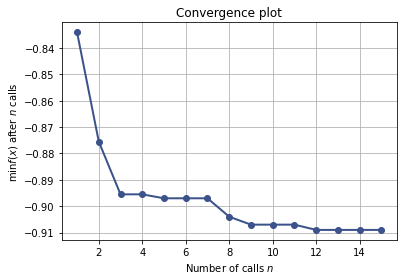

In [16]:
from skopt.plots import plot_convergence
plot_convergence(result)

## hyperopt

In [21]:
import numpy as np
import pandas as pd
from functools import partial
from sklearn import ensemble
from sklearn import metrics
from sklearn import model_selection
from hyperopt import hp, fmin, tpe, Trials
from hyperopt.pyll.base import scope

def optimize(params, x, y):
    """
    메인 최적화 함수.
    검색 범위로부터 모든 변수와 학습 피쳐, 타겟 변수를 가지고
    교차검증을 이용하여 모델을 학습하고 음의 정확도를 반환한다.
    :param params: gp_minimize 로부터 얻은 변수 값들
    :param param_names: 변수 이름 목록. 순서가 중요하다.
    :param x: 학습 데이터
    :param y: 타겟 변수
    :return: 5-폴드 교차검증 음의 정확도
    """
    
    # 현재 변수로 모델을 초기화한다.
    model = ensemble.RandomForestClassifier(**params)
    
    # 계층화 k-폴드를 초기화한다.
    kf = model_selection.StratifiedKFold(n_splits = 5)
    
    # 정확도 목록을 초기화한다.
    accuracies = []
    
    # 모든 폴드에 대해 루프를 적용한다.
    for idx in kf.split(X=x, y=y):
        train_idx, test_idx = idx[0], idx[1]
        xtrain = x[train_idx]
        ytrain = y[train_idx]
        xtest = x[test_idx]
        ytest = y[test_idx]
        
        # 현재 폴드에대해 모델을 학습한다.
        model.fit(xtrain, ytrain)
        
        # 폴드외 예측 값을 생성한다.
        preds = model.predict(xtest)
        
        # 정확도를 계산하여 정확도 목록에 추가한다.
        fold_accuracy = metrics.accuracy_score(
        ytest,
        preds
        )
        
        accuracies.append(fold_accuracy)
        
    # 음의 정확도를 반환한다.
    return -1 * np.mean(accuracies)

if __name__ == "__main__":
    
    # 학습 데이터를 불러온다.
    df = pd.read_csv("mobile_train.csv")
    
    # price_range 를 제외한 모든 열을 피쳐로 사용한다.
    # 이 데이터에는 id 열이 존재하지 않는다.
    X = df.drop("price_range", axis=1).values
    
    # 타겟 변수를 추출한다.
    y = df.price_range.values
    
    # 변수 범위를 정의한다.
    # 이번에는 hyperopt 를 사용한다.
    param_space = {
        # quniform 은 다음과 같다: round(uniform(low, high) / q) * q
        # depth and n_estimators 은 정수이다.
        "max_depth": scope.int(hp.quniform("max_depth", 1, 15, 1)),
        "n_estimators": scope.int(
            hp.quniform("n_estimators", 100, 1500, 1)
    ),
    # choice 는 목록의 값 중에 선택한다.
    "criterion": hp.choice("criterion", ["gini", "entropy"]),
    # uniform 은 두 값 사이의 값을 선택한다.
    "max_features": hp.uniform("max_features", 0, 1)
    }
    
    # partial 함수
    optimization_function = partial(
        optimize,
        x=X,
        y=y,
    )
    
    # 정보를 로그로 남기기위해 Trials 객체를 사용한다.
    trials = Trials()

    # hyperopt 를 사용하여 최적화를 실행한다.
    hopt = fmin(
        fn=optimization_function,
        space=param_space,
        algo=tpe.suggest,
        max_evals=15,
        trials=trials
    )
    print(hopt)

100%|██████████| 15/15 [03:22<00:00, 13.49s/trial, best loss: -0.908]            
{'criterion': 1, 'max_depth': 10.0, 'max_features': 0.6691396930523665, 'n_estimators': 1137.0}
